In [41]:
# Importing necessary libraries for this challenge

# Visaulization and dataset handling
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Normalization and dataset split into training and testing sets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Classification algorithms
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
# Loading data from json
data = pd.read_json('challenge/challenge.json')
print(data.shape)
data.head(10)

(204428, 14)


,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,0,190,2017-11-10T00:00:00Z,1613.53,21804,10,854,292.91,25.04,0,0,0.0
1,433,0,1,153,2011-05-16T00:00:00Z,11163.69,5486,20,246,287.19,12.33,0,5,0.0
2,486,0,0,166,2018-01-24T00:00:00Z,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,0,1,156,2010-07-28T00:00:00Z,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,0,1,218,2010-12-17T00:00:00Z,1736.48,4730,5,1786,66.87,11.82,0,0,0.0
5,740,0,8,213,2009-05-07T00:00:00Z,445.10,1835,10,2854,226.80,21.60,0,0,0.0
6,58,0,0,179,2013-12-17T00:00:00Z,573.06,11450,6,246,105.51,15.68,0,0,0.0
7,408,0,1,199,2009-09-29T00:00:00Z,1201.44,2504,6,1842,34.26,5.71,0,0,0.0
8,25,0,0,94,2017-11-09T00:00:00Z,1397.78,21773,10,1767,482.60,48.26,0,0,0.0
9,58,0,1,179,2008-08-19T00:00:00Z,2687.76,843,2,410,66.42,31.63,0,0,0.0


<b>Question 1: List as many use cases as possible for this dataset</b>

- Análise de churn a partir das variáveis de entrada<br>
- Previsão de vendas (em quantidade de itens) de um determinado produto<br>
- Recomendação de produto a partir das datas de ordem e código de cliente, por exemplo<br>
- Previsão de receita, baseada na quantidade de vendas de um item e valor unitário por data de registro, por exemplo<br>
- Análise dos canais de venda e vendedores com melhor desempenho de vendas em quantidade de itens<br>
- Clientes que mais realizam compras por quantidade de itens e valor total<br>

<b>Question 2: Pick one of the use cases listed above and describe how building a statistical model based on the dataset could best be used to improve the business this data come from</b>

- Escolhi o primeiro caso de uso: análise de churn a partir de determinadas variáveis de entrada (serão listadas na análise a seguir). O modelo estatístico escolhido auxilia a descrever quais são as variáveis mais correlacionadas com o churn dos clientes e qual a estratégia adotada para evitar rescisões de contrato. 

In [3]:
# First of all, we perform a quick descritive analysis of our variables (type and unique values)

for var in data:
    print(var, '- type: ', data[var].dtype.name)
    print(data[var].unique(), '\n')

customer_code - type:  int64
[143 433 486 107 768 740  58 408  25 763 475 562  28 114 400 187 613 217
 470 459 525 503 273 781 267 548 738 145 572 506 609 658 568 729 652 126
 594 522  84   8 469 549 640 275 614 220 326 209 575 636 158 633  91 297
 366 561 817 581 545 105 235 178 280 834 439 760 792 579 196 551 284 156
 822 370  46 592 556 620 422 245 621 385 812 250 314 682 800 664 808 599
 356  35 338 413 644 311 759 483 701 611 106 788 590  22   2 558 160  39
  81 203 237 618 243 447 424 153 194 175 382 416  85  98 147 603 441 133
 778 221 484 739 654 202 787 485 638 417 764  80 573 587 598 299 806 103
 679 823 741 471 390 383 726 509 723 329 310 684 261 419 830 554 462 507
 819 580 757 445 543 824  75 524  40 651 653   6 101 128 721 517 474 415
 199 820  11 553 337 660 743 719  79 477 219  29  94 557 698 528 591 747
 805 495 578 728 785  51 323 305 676 605 672 444 481 414 706 707 236 685
 529 722 567 343  24 773 269 796 807 717 772 393 700 429 490 732 180 762
  69 207 465 239 121 3

In [4]:
# We can disconsider branch_id since all its values are zero
# We begin to clean the NaN values of our dataset

data.isnull().sum().sort_values(ascending=False)

is_churn            1915
segment_code           0
group_code             0
unit_price             0
item_total_price       0
item_code              0
quantity               0
order_id               0
total_price            0
register_date          0
seller_code            0
sales_channel          0
branch_id              0
customer_code          0
dtype: int64

In [5]:
data.loc[data['is_churn'].isna()]

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
73,834,0,0,140,2014-09-30T00:00:00Z,966.87,13192,1,2790,22.31,22.31,3,7,NaN
78,792,0,0,101,2015-06-08T00:00:00Z,3053.39,14680,48,2630,783.36,16.32,3,7,NaN
241,721,0,0,182,2013-02-26T00:00:00Z,5074.97,9455,6,2673,70.75,11.59,3,7,NaN
315,529,0,0,83,2015-01-22T00:00:00Z,1664.96,13842,18,795,320.09,314.64,3,7,NaN
377,319,0,7,177,2017-09-01T00:00:00Z,828.94,20977,3,1763,119.64,39.20,3,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203638,792,0,0,101,2015-02-18T00:00:00Z,3081.79,14005,18,795,279.00,279.00,3,7,NaN
203694,529,0,1,41,2012-05-07T00:00:00Z,2351.54,7624,1,532,126.43,124.28,3,7,NaN
204121,319,0,0,177,2017-07-10T00:00:00Z,1004.02,20307,4,1767,252.42,62.03,3,7,NaN
204240,16,0,6,150,2015-04-15T00:00:00Z,1564.63,14384,2,1785,29.84,14.92,3,7,NaN


In [6]:
# From the previous observation, it seems that all the registers whose 
# group_code is 3 and segment_code is 7 are not declaring churn
data.loc[(data['is_churn'].isna()) & (data['group_code'] != 3) & (data['segment_code'] != 7)]

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn


In [7]:
# Let's take a look whether there is some non-null register whose group_code is 3 and segment_code is 7
data.loc[~(data['is_churn'].isna()) & (data['group_code'] == 3) & (data['segment_code'] == 7)]

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn


In [8]:
# We can conclude that every register from group_code 3 and segment_group 7 has not declared its 'is_churn'
# We will remove these NaN data and duplicated data from our dataset
data = data.dropna()
print(data.shape)

(202513, 14)


In [9]:
data[data.duplicated()]

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
35125,633,0,0,190,2015-09-07T00:00:00Z,26.56,15284,1,2014,0.31,0.28,2,2,1.0
36547,114,0,2,273,2014-03-05T00:00:00Z,1090.46,11878,1,862,6.20,6.20,2,2,1.0
39313,114,0,2,273,2012-12-11T00:00:00Z,780.56,9038,1,1027,37.96,37.96,2,2,1.0
40997,158,0,0,50,2015-10-04T00:00:00Z,47.14,15469,1,1866,1.40,1.22,0,0,0.0
58779,633,0,0,190,2015-05-18T00:00:00Z,56.73,14560,1,1950,0.85,0.74,2,2,1.0
69280,633,0,0,190,2016-07-31T00:00:00Z,97.48,17437,1,2264,0.26,0.26,2,2,1.0
81558,260,0,0,95,2016-11-17T00:00:00Z,1510.66,18242,1,2759,14.39,13.08,0,5,1.0
87042,633,0,0,190,2015-05-18T00:00:00Z,56.73,14560,1,1950,0.85,0.74,2,2,1.0
88868,158,0,0,50,2015-10-04T00:00:00Z,47.14,15469,1,934,1.14,0.99,0,0,0.0
90844,633,0,0,190,2015-05-18T00:00:00Z,56.73,14560,1,2763,0.39,0.34,2,2,1.0


In [10]:
data = data.drop_duplicates(keep='first') # Same as doing data.drop_duplicates(keep='first', inplace=True)
print(data.shape)

(202466, 14)


In [11]:
# From the descritive analysis below, we can observe that some variables present outliers
# For example, quantity and item_total_price

for var in data:
    print(var, '- type: ', data[var].dtype.name)
    print(data[var].describe(), '\n')
    print(data[var].value_counts().sort_index())
    print('\n\n')

customer_code - type:  int64
count    202466.000000
mean        446.622638
std         246.733796
min           0.000000
25%         220.000000
50%         485.000000
75%         650.000000
max         837.000000
Name: customer_code, dtype: float64 

0      179
1      471
2      307
3      635
4      301
      ... 
832    320
833    337
835     27
836    807
837    148
Name: customer_code, Length: 818, dtype: int64



branch_id - type:  int64
count    202466.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: branch_id, dtype: float64 

0    202466
Name: branch_id, dtype: int64



sales_channel - type:  int64
count    202466.000000
mean          1.766124
std           2.936077
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         105.000000
Name: sales_channel, dtype: float64 

0      102949
1       47351
2        6012
3          10
4        3458
        .

In [12]:
# In order to build our model, we can remove column 'branch_id' and remove outliers from columns below:
# total_price, quantity, item_total_price and unit_price

data.drop(columns=['branch_id'], inplace=True)
data.head()

,customer_code,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,190,2017-11-10T00:00:00Z,1613.53,21804,10,854,292.91,25.04,0,0,0.0
1,433,1,153,2011-05-16T00:00:00Z,11163.69,5486,20,246,287.19,12.33,0,5,0.0
2,486,0,166,2018-01-24T00:00:00Z,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,1,156,2010-07-28T00:00:00Z,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,1,218,2010-12-17T00:00:00Z,1736.48,4730,5,1786,66.87,11.82,0,0,0.0


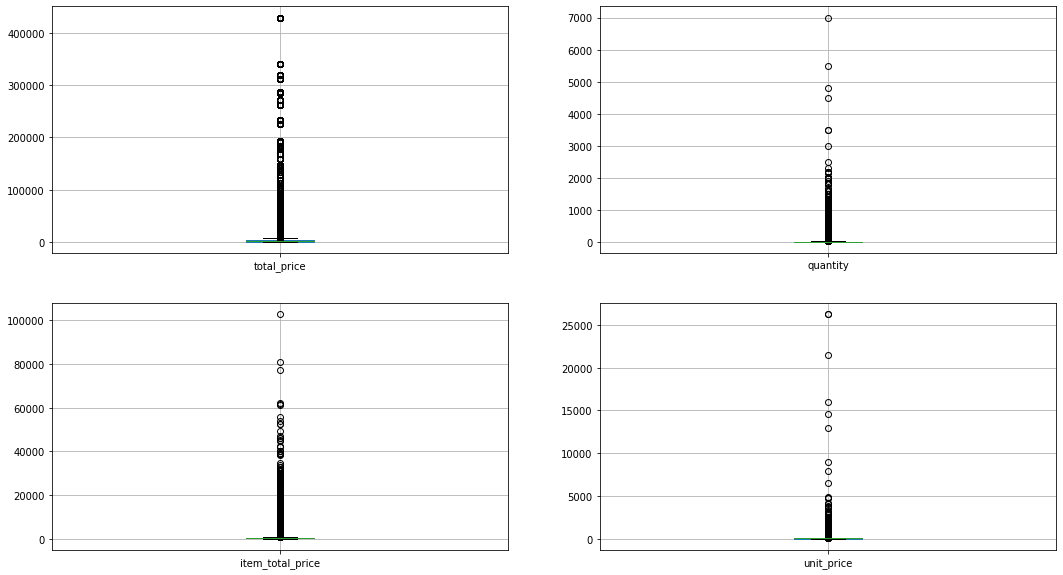

In [13]:
plt.figure(figsize=(18,10))
plt.subplot(221); data.boxplot(['total_price'])
plt.subplot(222); data.boxplot(['quantity'])
plt.subplot(223); data.boxplot(['item_total_price'])
plt.subplot(224); data.boxplot(['unit_price'])

In [14]:
# We use interquartile distance in order to remove outliers from these variables

data_inliers = data.copy()
variables = ['total_price', 'quantity', 'item_total_price', 'unit_price']
for var in variables:
    Q1 = data_inliers[var].quantile(0.25)
    Q3 = data_inliers[var].quantile(0.75)
    IQR = Q3 - Q1
    data_inliers = data_inliers[(data_inliers[var] >= Q1-(IQR*1.5)) & (data_inliers[var] <= Q3+(IQR*1.5))]

(145670, 13)


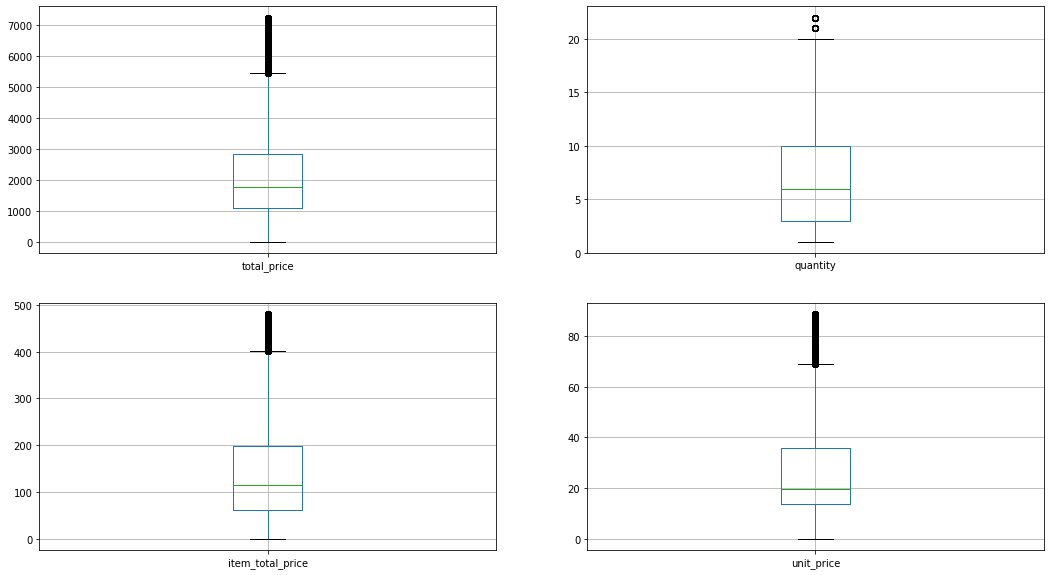

In [15]:
# Observing how many data we excluded from interquartile range

print(data_inliers.shape)

plt.figure(figsize=(18,10))
plt.subplot(221); data_inliers.boxplot(['total_price'])
plt.subplot(222); data_inliers.boxplot(['quantity'])
plt.subplot(223); data_inliers.boxplot(['item_total_price'])
plt.subplot(224); data_inliers.boxplot(['unit_price'])

In [16]:
# The last modification we should do before proceeding to our model regards 'register_date'
# The only non-numeric input variable is register_date 
# We can transform it into a numerical variable by ordering it from 0 (latest) to 3069 (most recent) 
# since it has 3070 unique values

register_date_ord = data_inliers['register_date'].sort_values().unique()
num_register_date_ord = np.arange(data_inliers['register_date'].unique().shape[0])
print(register_date_ord)
print(num_register_date_ord)

# We create a dictionary to map the old and the new values
map_register_date = dict(zip(register_date_ord, num_register_date_ord))
print(map_register_date)

['2008-01-04T00:00:00Z' '2008-01-07T00:00:00Z' '2008-01-08T00:00:00Z' ...
 '2018-07-06T00:00:00Z' '2018-07-07T00:00:00Z' '2018-07-08T00:00:00Z']
[   0    1    2 ... 3067 3068 3069]
{'2008-01-04T00:00:00Z': 0, '2008-01-07T00:00:00Z': 1, '2008-01-08T00:00:00Z': 2, '2008-01-09T00:00:00Z': 3, '2008-01-10T00:00:00Z': 4, '2008-01-11T00:00:00Z': 5, '2008-01-14T00:00:00Z': 6, '2008-01-15T00:00:00Z': 7, '2008-01-16T00:00:00Z': 8, '2008-01-17T00:00:00Z': 9, '2008-01-18T00:00:00Z': 10, '2008-01-19T00:00:00Z': 11, '2008-01-21T00:00:00Z': 12, '2008-01-22T00:00:00Z': 13, '2008-01-23T00:00:00Z': 14, '2008-01-24T00:00:00Z': 15, '2008-01-25T00:00:00Z': 16, '2008-01-26T00:00:00Z': 17, '2008-01-28T00:00:00Z': 18, '2008-01-29T00:00:00Z': 19, '2008-01-30T00:00:00Z': 20, '2008-01-31T00:00:00Z': 21, '2008-02-01T00:00:00Z': 22, '2008-02-04T00:00:00Z': 23, '2008-02-05T00:00:00Z': 24, '2008-02-06T00:00:00Z': 25, '2008-02-07T00:00:00Z': 26, '2008-02-08T00:00:00Z': 27, '2008-02-11T00:00:00Z': 28, '2008-02-12T00:0

In [17]:
# We create a new column in our dataset with the correspondent ordered register_date
new_register_date = data_inliers['register_date'].map(map_register_date)
data_inliers.insert(4, column='register_date_map', value=new_register_date)
data_inliers.head(10)

,customer_code,sales_channel,seller_code,register_date,register_date_map,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,190,2017-11-10T00:00:00Z,2878,1613.53,21804,10,854,292.91,25.04,0,0,0.0
2,486,0,166,2018-01-24T00:00:00Z,2933,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,1,156,2010-07-28T00:00:00Z,714,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,1,218,2010-12-17T00:00:00Z,827,1736.48,4730,5,1786,66.87,11.82,0,0,0.0
5,740,8,213,2009-05-07T00:00:00Z,372,445.10,1835,10,2854,226.80,21.60,0,0,0.0
6,58,0,179,2013-12-17T00:00:00Z,1730,573.06,11450,6,246,105.51,15.68,0,0,0.0
7,408,1,199,2009-09-29T00:00:00Z,484,1201.44,2504,6,1842,34.26,5.71,0,0,0.0
9,58,1,179,2008-08-19T00:00:00Z,181,2687.76,843,2,410,66.42,31.63,0,0,0.0
11,475,0,285,2013-07-31T00:00:00Z,1616,1593.99,10497,12,2843,147.24,12.27,0,0,0.0
12,562,0,3,2016-07-19T00:00:00Z,2478,1378.27,17327,3,713,127.29,42.43,0,0,0.0


In [18]:
# We can remove the former 'register_date' column
data_inliers.drop(columns=['register_date'], inplace=True)
data_inliers.head()

,customer_code,sales_channel,seller_code,register_date_map,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,190,2878,1613.53,21804,10,854,292.91,25.04,0,0,0.0
2,486,0,166,2933,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,1,156,714,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,1,218,827,1736.48,4730,5,1786,66.87,11.82,0,0,0.0
5,740,8,213,372,445.10,1835,10,2854,226.80,21.60,0,0,0.0


<b>Question 3: Implement the model you described in question 2</b>

After removing NaN, duplicated data and outliers we can finally start to build our model.<br>
Our output is 'is_churn'. We should note that this class is unbalanced so we have to consider it when spliting our dataset into training and test sets.<br>

In [19]:
data_inliers['is_churn'].value_counts()

0.0    122715
1.0     22955
Name: is_churn, dtype: int64

In [20]:
# Let's call 'df' the dataset to be analyzed below and normalize its input values

df = data_inliers.to_numpy()
nrow, ncol = df.shape
x = df[:, 0:ncol-1]
y = df[:, -1]

# Normal distribution: mean = 0 and standard deviation = 1
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
print('Average: ', np.mean(x, axis=0))
print('Std deviation: ', np.std(x, axis=0))

Average:  [-8.77996104e-19  8.56046201e-18 -8.80922757e-17 -1.29114205e-16
 -1.57063747e-17 -2.16084597e-17  2.32181192e-17 -1.08871517e-16
 -1.75550443e-16  4.29144985e-16 -8.57265640e-17 -1.78525874e-17]
Std deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


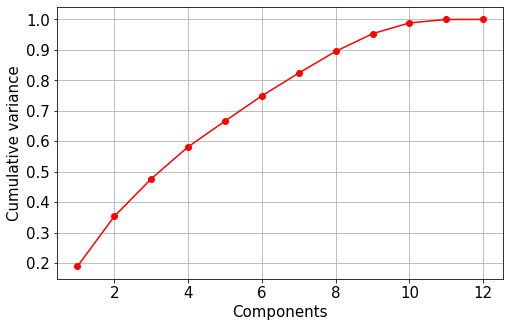

In [21]:
# Deciding the number of variables in our model: 75% of variance is explained by only half of the components

pca = PCA().fit(x)
plt.figure(figsize=(8,5))
n_comp = np.arange(1, np.shape(x)[1]+1)
plt.plot(n_comp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Components', fontsize=15)
plt.ylabel('Cumulative variance', fontsize=15);
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
plt.grid(True)
plt.show(True)

In [22]:
# We apply a stratified test_train split

p = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = p)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(116536, 12)
(29134, 12)
(116536,)
(29134,)


In [23]:
# Now the classification methods will be compared:
# 1-) Random Forest
# 2-) kNN (Nearest Neighbors)
# 3-) SVM with best c parameter
# 4-) Naive Bayes
# 5-) Xgboost
# 6-) Logistic Regression

# We use stratified cross-validation in our training dataset and AUC to measure its precision
# Models can run twice: once considering all components, then with less components according to PCA
# Using too many components may cause overfitting 

<b>Question 4: Explaining each design choice</b>

<b>1- Random Forest</b>

Best n_est: 45  Accuracy: 0.99801


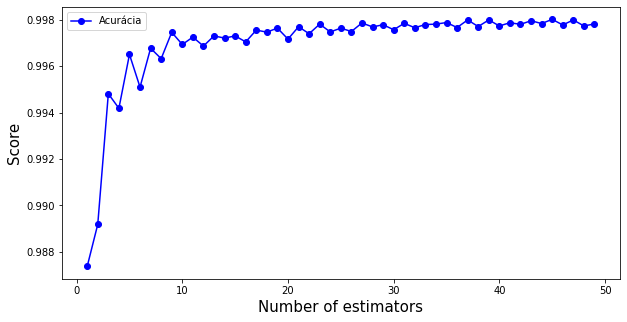

In [28]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
mean_accuracy = []
mean_auc = []
vector_n_est = []

for n_est in range(1, 50):
    vector_accuracy = []
    vector_auc = []
    
    # Spliting our training set into model training and validation
    for train_index, test_index in cv.split(x_train, y_train):
        x_model_train, x_model_validation = x_train[train_index], x_train[test_index]
        y_model_train, y_model_validation = y_train[train_index], y_train[test_index]
        
        model = RandomForestClassifier(n_estimators=n_est)
        model.fit(x_model_train, y_model_train)
        y_model_predict = model.predict(x_model_validation)
        
        # Evaluating our model
        vector_accuracy.append(accuracy_score(y_model_predict, y_model_validation))
        vector_auc.append(roc_auc_score(y_model_validation, y_model_predict))
        
    mean_accuracy.append(np.mean(vector_accuracy))
    mean_auc.append(np.mean(vector_auc))
    vector_n_est.append(n_est)
    
best_n_est = np.argmax(mean_accuracy) + 1
print("Best n_est:", best_n_est, " Accuracy: {:.5f}".format(mean_accuracy[best_n_est - 1]) )
plt.figure(figsize=(10,5))
plt.plot(vector_n_est, mean_accuracy, '-bo', label = 'Acurácia')
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [29]:
# Outcome from our model

model = RandomForestClassifier(n_estimators=best_n_est)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy: {:.5f}".format(accuracy_score(y_pred, y_test)) )

Accuracy: 0.99859


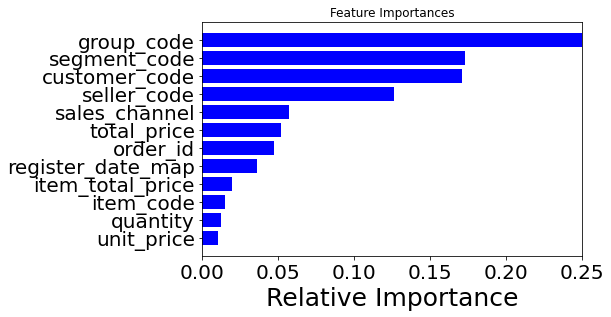

In [32]:
# We can train our model using only the most relevant parameters according to PCA

importances = model.feature_importances_
attributes = data_inliers.columns[0:len(data_inliers.columns)-1]
indices = np.argsort(importances)
attributes_rank = []

for i in indices:
    attributes_rank.append(attributes[i])
    
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

In [37]:
# From now on we are going to use only 5 attributes (almost 70% of data variance is explained by 5 attributes)
# These attributes are obtained from random forest
# We can run models with more or less components, however its costly to run models all the time
# It's possible to do it for every model however there is no much time so we consider the same 5 attributes for all models

x_train = x_train[:, [0,1,2,10,11]]
x_test = x_test[:, [0,1,2,10,11]]

<b>From now on we use 5 components in our models. This is also a matter of performance for our tests.</b>

Best n_est: 11  Accuracy: 0.99995


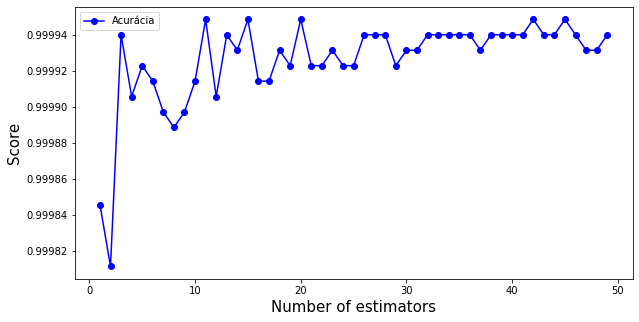

In [34]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
mean_accuracy = []
mean_auc = []
vector_n_est = []

for n_est in range(1, 50):
    vector_accuracy = []
    vector_auc = []
    
    # Spliting our training set into model training and validation
    for train_index, test_index in cv.split(x_train, y_train):
        x_model_train, x_model_validation = x_train[train_index], x_train[test_index]
        y_model_train, y_model_validation = y_train[train_index], y_train[test_index]
        
        model = RandomForestClassifier(n_estimators=n_est)
        model.fit(x_model_train, y_model_train)
        y_model_predict = model.predict(x_model_validation)
        
        # Evaluating our model
        vector_accuracy.append(accuracy_score(y_model_predict, y_model_validation))
        vector_auc.append(roc_auc_score(y_model_validation, y_model_predict))
        
    mean_accuracy.append(np.mean(vector_accuracy))
    mean_auc.append(np.mean(vector_auc))
    vector_n_est.append(n_est)
    
best_n_est = np.argmax(mean_accuracy) + 1
print("Best n_est:", best_n_est, " Accuracy: {:.5f}".format(mean_accuracy[best_n_est - 1]) )
plt.figure(figsize=(10,5))
plt.plot(vector_n_est, mean_accuracy, '-bo', label = 'Acurácia')
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [43]:
# Outcome from our model

model = RandomForestClassifier(n_estimators=best_n_est)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy: {:.5f}".format(accuracy_score(y_pred, y_test)) )

Accuracy: 1.00000


<b>2- kNN</b>

Best k: 1  Accuracy: 0.99965


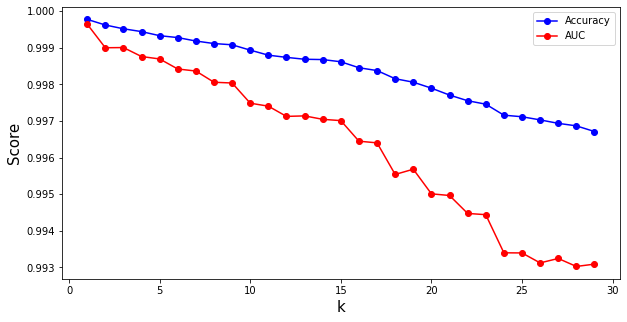

In [44]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
mean_accuracy = []
mean_auc = []
vector_k = []

for k in range(1, 30):
    vector_accuracy = []
    vector_auc = []
    
    # Spliting our training set into model training and validation
    for train_index, test_index in cv.split(x_train, y_train):
        x_model_train, x_model_validation = x_train[train_index], x_train[test_index]
        y_model_train, y_model_validation = y_train[train_index], y_train[test_index]
        
        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_model_train, y_model_train)
        y_model_predict = model.predict(x_model_validation)
        
        vector_accuracy.append(accuracy_score(y_model_predict, y_model_validation))
        vector_auc.append(roc_auc_score(y_model_validation, y_model_predict))
        
    mean_accuracy.append(np.mean(vector_accuracy))
    mean_auc.append(np.mean(vector_auc))
    vector_k.append(k)
    
best_k = np.argmax(mean_accuracy) + 1
print("Best k:", best_k, " Accuracy: {:.5f}".format(mean_auc[best_k - 1]) )
plt.figure(figsize=(10,5))
plt.plot(vector_k, mean_accuracy, '-bo', label = 'Accuracy')
plt.plot(vector_k, mean_auc, '-ro', label = 'AUC')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [45]:
# Outcome from our model

model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

print("Accuracy {:.5f}".format(accuracy_score(y_pred, y_test))) 

Accuracy 0.99993


<b>3- SVM with best c</b>

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
mean_accuracy = []
mean_auc = []
vector_c = []

for c in np.arange(1, 5, 0.1):
    vector_accuracy = []
    vector_auc = []
    
    # Spliting our training set into model training and validation
    for train_index, test_index in cv.split(x_train, y_train):
        x_model_train, x_model_validation = x_train[train_index], x_train[test_index]
        y_model_train, y_model_validation = y_train[train_index], y_train[test_index]
        
        model = SVC(C = c, gamma = 'auto')
        model.fit(x_model_train, y_model_train)
        y_model_predict = model.predict(x_model_validation)
        
        vector_accuracy.append(accuracy_score(y_model_predict, y_model_validation))
        vector_auc.append(roc_auc_score(y_model_validation, y_model_predict))
        
    mean_accuracy.append(np.mean(vector_accuracy))
    mean_auc.append(np.mean(vector_auc))
    vector_c.append(c)
    
best_c = np.argmax(mean_accuracy) + 1
print("Best c:", best_c, " Accuracy: {:.5f}".format(mean_auc[best_c - 1]) )
plt.figure(figsize=(10,5))
plt.plot(vector_c, mean_accuracy, '-bo', label = 'Accuracy')
plt.plot(vector_c, mean_auc, '-ro', label = 'AUC')
plt.xlabel('c', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
# Outcome from our model

model = SVC(C=best_c,  gamma = 'auto')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy {:.5f}".format(accuracy_score(y_pred, y_test))) 

<b>4- Naive Bayes assuming Normal Distribution</b>

We assume normal distribuition due to Central Limit Theory (great number of data tends to present normal distribution).

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
mean_accuracy = 0
mean_auc = 0

# Spliting our training set into model training and validation
for train_index, test_index in cv.split(x_train, y_train):
    x_model_train, x_model_validation = x_train[train_index], x_train[test_index]
    y_model_train, y_model_validation = y_train[train_index], y_train[test_index]

    model = GaussianNB()
    model.fit(x_model_train, y_model_train)
    y_model_predict = model.predict(x_model_validation)
    
    # Evaluating our model
    vector_accuracy.append(accuracy_score(y_model_predict, y_model_validation))
    vector_auc.append(roc_auc_score(y_model_validation, y_model_predict))

mean_accuracy = np.mean(vector_accuracy)
mean_auc = np.mean(vector_auc)

print(" Accuracy: {:.5f}".format(mean_accuracy) )

In [ ]:
# Outcome from our model

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy: {:.5f}".format(accuracy_score(y_pred, y_test)) )

<b>5- XGBoost</b>

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
mean_accuracy = 0
mean_auc = 0

# Spliting our training set into model training and validation
for train_index, test_index in cv.split(x_train, y_train):
    x_model_train, x_model_validation = x_train[train_index], x_train[test_index]
    y_model_train, y_model_validation = y_train[train_index], y_train[test_index]

    model = XGBClassifier()
    model.fit(x_model_train, y_model_train)
    y_model_predict = model.predict(x_model_validation)
    
    # Evaluating our model
    vector_accuracy.append(accuracy_score(y_model_predict, y_model_validation))
    vector_auc.append(roc_auc_score(y_model_validation, y_model_predict))

mean_accuracy = np.mean(vector_accuracy)
mean_auc = np.mean(vector_auc)

print(" Accuracy: {:.5f}".format(mean_accuracy) )

In [ ]:
# Outcome from our model

model = BernoulliNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy: {:.5f}".format(accuracy_score(y_pred, y_test)) )

<b>6- Logistc Regression</b>

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
mean_accuracy = 0
mean_auc = 0

# Spliting our training set into model training and validation
for train_index, test_index in cv.split(x_train, y_train):
    x_model_train, x_model_validation = x_train[train_index], x_train[test_index]
    y_model_train, y_model_validation = y_train[train_index], y_train[test_index]

    model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    model.fit(x_model_train, y_model_train)
    y_model_predict = model.predict(x_model_validation)
    
    # Evaluating our model
    vector_accuracy.append(accuracy_score(y_model_predict, y_model_validation))
    vector_auc.append(roc_auc_score(y_model_validation, y_model_predict))

mean_accuracy = np.mean(vector_accuracy)
mean_auc = np.mean(vector_auc)

print(" Accuracy: {:.5f}".format(mean_accuracy) )

In [ ]:
# Outcome from our model

model = BernoulliNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy: {:.5f}".format(accuracy_score(y_pred, y_test)) )

<b> CONCLUSION </b>

The best predicition model was Random Forest since it presented the best accuracy on our test set.
Techniques to improve statistical models: data cleaning, removing outliers and non-relevant components by using PCA.
In order to improve performance, we could have used a reduced number of samples in order to avoid overfitting or testing different splits (p=0.3 for our test set, for example). 
We could also use f1_score to measure accuracy and plot confusion matrix to show the following categories:<br>
- true positive
- false positive
- true negative
- false negative

Note that we must take care about overfitting. For example, kNN with k = 1 can mean an overfitted model so we can consider the second better k.

In [ ]:
# For the best model: Random Forest

from sklearn.metrics import confusion_matrix

true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, y_pred).ravel()
print('True positive: ', true_positive/len(y_test))
print('False positive: ', false_positive/len(y_test))
print('True negative: ', true_negative/len(y_test))
print('False negative: ', false_negative/len(y_test))